In [2]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [4]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape

(768, 9)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [25]:
X = dataset[:,0:8]
Y = dataset[:,8]

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=4)

In [28]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(8,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [29]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'] 
)

In [30]:
hist = model.fit( X_train, Y_train, batch_size=57, epochs=1000, validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 11s 63ms/step - loss: 0.6970 - accuracy: 0.3691 - val_loss: 0.6919 - val_accuracy: 0.5285
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5419 - val_loss: 0.6888 - val_accuracy: 0.6504
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.6571 - val_loss: 0.6860 - val_accuracy: 0.6504
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.6533 - val_loss: 0.6834 - val_accuracy: 0.6504
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.6127 - val_loss: 0.6807 - val_accuracy: 0.6504
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6670 - val_loss: 0.6783 - val_accuracy: 0.6504
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.6788 - val_loss: 0.6762 - val_accuracy: 0.6504
Epoch 8/1000
9/9 [

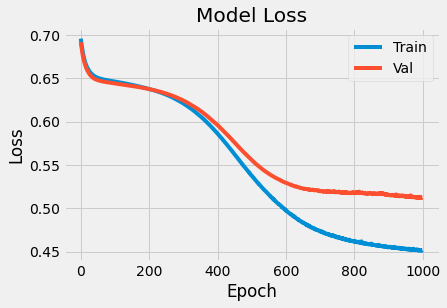

In [32]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

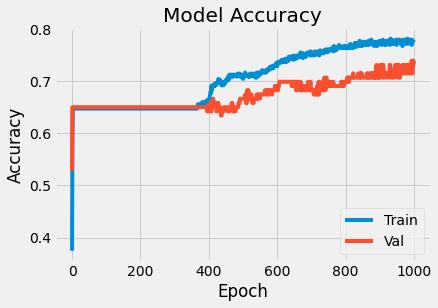

In [33]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

In [34]:
prediction = model.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
prediction

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(Y_train, pred))
print('confusion_matrix: \n', confusion_matrix(Y_train, pred))
print('Accuracy: ', accuracy_score(Y_train, pred))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       398
         1.0       0.70      0.61      0.65       216

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.74       614
weighted avg       0.77      0.77      0.77       614

confusion_matrix: 
 [[341  57]
 [ 84 132]]
Accuracy:  0.7703583061889251


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
print(classification_report(Y_test, pred))
print('confusion_matrix: \n', confusion_matrix(Y_test, pred))
print('Accuracy: ', accuracy_score(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       102
         1.0       0.72      0.73      0.72        52

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

confusion_matrix: 
 [[87 15]
 [14 38]]
Accuracy:  0.8116883116883117
